In [1]:
# p - populacija

# SI - swarm intelligence

# PSO - particle swarm optimization

# swarm = [Particle()]
# globalno
# while not stop_condition:
#     for svaka cestica:
#         r_l, r_g ~ U(0,1)
#         izracunaj novu brzinu: v = c_i*inercija + r_l*c_l*lokalno + r_g*c_g*globalno
#         pomeri cesticu: p = p + v
#         usput azuriraj ako treba lokalni i globalni minimum
# resenje je: globalni minimum

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [13]:
def rastrigin(x):
    A = 10
    return A*2 + sum([x_i**2 - A * np.cos(2*np.pi*x_i) for x_i in x])

In [14]:
def rosenbrock(x):
    a = 1
    b = 100
    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2

In [15]:
bounds = [(-5.12, 5.12), (-5.12, 5.12)]

In [16]:
class Particle:
    
    def __init__(self, objective, bounds, w=0.75, c1=1, c2=2):
        self.position = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))]
        self.velocity = [random.uniform(-(bounds[i][1] - bounds[i][0]),
                                        bounds[i][1] - bounds[i][0]) for i in range(len(bounds))]
        self.bestPosition = list(self.position)
        self.currentValue = objective(self.position)
        self.bestValue = self.currentValue
        
        self.objective = objective
        self.bounds = bounds
        self.w = w
        self.c1 = c2
        self.c2 = c2
        
    def updatePosition(self, globalBestPosition, globalBestValue):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]
            
            if self.position[i] > self.bounds[i][1]:
                self.position[i] = self.bounds[i][1]
            elif self.position[i] < self.bounds[i][0]:
                self.position[i] = self.bounds[i][0]
        
        self.currentValue = self.objective(self.position)
        if self.currentValue < self.bestValue:
            self.bestValue = self.currentValue
            self.bestPosition = list(self.position)
            
            if self.currentValue < globalBestValue:
                globalBestValue = self.currentValue
                globalBestPosition = list(self.position)
                
        return globalBestPosition, globalBestValue
        
    def updateVelocity(self, globalBestPosition):
        for i in range(len(self.velocity)):
            r1 = random.random()
            r2 = random.random()
            
            cognitive_velocity = r1 * self.c1 * (self.bestPosition[i] - self.position[i])
            social_velocity = r2 * self.c2 * (globalBestPosition[i] - self.position[i])
            
            self.velocity[i] = self.w * self.velocity[i] + cognitive_velocity + social_velocity

Solution: [0.9983771837128758, 0.9967872475916308], value: 2.7250185836132615e-06


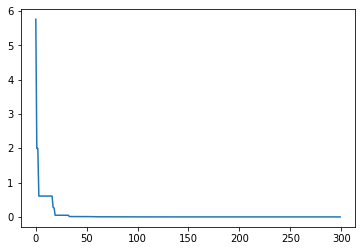

In [21]:
SWARM_SIZE = 50
MAX_ITER = 300

swarm = [Particle(rosenbrock, bounds) for _ in range(SWARM_SIZE)]
globalBestPosition = list(swarm[0].position)
globalBestValue = swarm[0].currentValue
for particle in swarm:
    if particle.currentValue < globalBestValue:
        globalBestValue = particle.currentValue
        globalBestPosition = list(particle.position)

bests = []
for i in range(MAX_ITER):
    for j in range(len(swarm)):
        swarm[j].updateVelocity(globalBestPosition)
        globalBestPosition, globalBestValue = swarm[j].updatePosition(globalBestPosition, globalBestValue)
        
    bests.append(globalBestValue)
    
print('Solution: {}, value: {}'.format(globalBestPosition, globalBestValue))

plt.plot(range(MAX_ITER), bests)